In [4]:
using DifferentialEquations, Plots, LinearAlgebra, LaTeXStrings
include("utils.jl")

animate_trajectory (generic function with 1 method)

# Geodésicas en Schwarzschild

Recordemos que en Schwarzschild las cantidades conservadas son

$$ \varepsilon = \left( 1 - \dfrac{2M}{r} \right)\dfrac{dt}{d\lambda}, $$

$$ \ell = r^{2}\sin^{2}\theta \dfrac{d\varphi}{d\lambda}. $$

Debido a la simetría esférica las trayectorias que siguen partículas libres ocurren en un plano; por simplicidad elegimos el plano ecuatorial $\theta = \pi/2$. Además, debido a la invariancia del intervalo la cantidad

$$ e = g_{\mu\nu}\dfrac{dx^{\mu}}{d\lambda}\dfrac{dx^{\nu}}{d\lambda} $$

es una constante a lo largo de las geodésicas. Para partículas con masa $e = -1$, mientras que para fotones $e = 0$. Entonces, bajo la suposición de que $\theta = \pi/2$

$$ e = g_{\mu\nu}\dfrac{dx^{\mu}}{d\lambda}\dfrac{dx^{\nu}}{d\lambda} = -\left( 1 - \dfrac{2M}{r} \right) 
\left( \dfrac{dt}{d\lambda} \right)^2 + \left( 1 - \dfrac{2M}{r} \right)^{-1}\left( \dfrac{dr}{d\lambda} \right)^2 + r^{2}\left( \dfrac{d\varphi}{d\lambda} \right)^{2}.$$

Con ayuda de las cantidades conservadas podemos escribir lo anterior como

$$ -\varepsilon^{2} + \left( \dfrac{dr}{d\lambda} \right)^{2} + \left( 1 - \dfrac{2M}{r} \right)\dfrac{\ell^{2}}{r^{2}} = e\left( 1 - \dfrac{2M}{r} \right), $$

o equivalentemente

$$ \dfrac{1}{2}\left( \dfrac{dr}{d\lambda} \right)^{2} + V(r) = \dfrac{1}{2} \varepsilon^{2},$$

donde hemos definido el potencial efectivo como $V(r) = \dfrac{1}{2}\left( 1 - \dfrac{2M}{r} \right)\left( \dfrac{\ell^2}{r^2} - e \right)$. Entonces, para el caso de los fotones

\begin{align*}
\left( \dfrac{dr}{d\lambda} \right)^{2} &= \varepsilon^{2} - 2V(r), \qquad V(r) = \dfrac{\ell^{2}}{2r^{2}} \left( 1 - \dfrac{2M}{r} \right), \\
\left( \dfrac{d\varphi}{d\lambda} \right)^{2} &= \dfrac{\ell^{2}}{r^{4}}. 
\end{align*}

Combinando ambas ecuaciones se tiene que

$$ \left( \dfrac{dr}{d\varphi} \right)^{2} = \left( \dfrac{\frac{dr}{d\lambda}}{\frac{d\varphi}{d\lambda}} \right)^{2} = r^{4} \left[ \dfrac{\varepsilon^{2}}{\ell^{2}} - \dfrac{1}{r^{2}} \left( 1 - \dfrac{2M}{r} \right) \right] = r^{4} \left[ \dfrac{1}{b^{2}} - \dfrac{1}{r^{2}} \left( 1 - \dfrac{2M}{r} \right) \right], $$

donde hemos definido el parámetro $b = \ell/\varepsilon$. Derivando nuevamente esta ecuación queda

$$ 2\dfrac{dr}{d\varphi}\dfrac{d^{2}r}{d\varphi^{2}} = \dfrac{4r^{3}}{b^{2}}\dfrac{dr}{d\varphi} - 2r\dfrac{dr}{d\varphi} + 2M\dfrac{dr}{d\varphi}, $$

con lo que finalmente nos queda

$$ \dfrac{d^{2}r}{d\varphi^{2}} =  \dfrac{2r^{3}}{b^{2}} - r + M. $$

Para resolverla necesitamos las condiciones iniciales $r \big|_{\varphi_{0}} = r_{0}$ y $\dfrac{dr}{d\varphi}\Biggr|_{\varphi_{0}}$; para la segunda condición hay que recordar que $g_{\mu\nu}dx^{\mu}dx^{\nu} = 0$, con lo que podemos decir que

\begin{align*}
0 = g_{\mu\nu}\dfrac{dx^{\mu}}{d\lambda}\dfrac{dx^{\nu}}{d\lambda} &=  -\left( 1 - \dfrac{2M}{r} \right) \left( \dfrac{dt}{d\lambda} \right)^{2} + \left( 1 - \dfrac{2M}{r} \right)^{-1}\left( \dfrac{dr}{d\lambda} \right)^{2} + r^{2}\left( \dfrac{d\varphi}{d\lambda} \right)^{2}\\
&= -\left( 1 - \dfrac{2M}{r} \right)^{-1}\varepsilon^{2} + \left( 1 - \dfrac{2M}{r} \right)^{-1}\left( \dfrac{dr}{d\lambda} \right)^{2} + \dfrac{\ell^{2}}{r^{2}},
\end{align*}

por lo que 

$$ \dfrac{dr}{d\lambda} = \pm \left( 1 - \dfrac{2M}{r} \right) \sqrt{\left( 1 - \dfrac{2M}{r} \right)^{-1}\varepsilon^{2} - \dfrac{\ell^{2}}{r^{2}}},$$

donde nos quedamos con el signo - si es que va cayendo, luego $\dfrac{d\varphi}{d\lambda} = \dfrac{\ell}{r^{2}}$, por lo que

$$ \dfrac{dr}{d\varphi} = \dfrac{dr}{d\lambda} \Big/ \dfrac{d\varphi}{d\lambda} $$

Las ecuaciones de la geodésica para el caso de Schwarzschild son

\begin{align}
\dfrac{d^2 t}{d\lambda^2} &= \dfrac{2M}{2Mr - r^2} \left( \dfrac{dt}{d\lambda} \right) \left( \dfrac{dr}{d\lambda} \right), \\
\dfrac{d^2 r}{d\lambda^2} &= \dfrac{M(2M-r)}{r^3} \left( \dfrac{dt}{d\lambda} \right)^{2} - \dfrac{M}{2Mr - r^2} \left( \dfrac{dr}{d\lambda} \right)^{2} - (2M - r) \left( \dfrac{d\theta}{d\lambda} \right)^{2} - (2M - r)\sin^{2}\theta \left( \dfrac{d\phi}{d\lambda} \right)^{2}, \\
\dfrac{d^2 \theta}{d\lambda^2} &= - \dfrac{2}{r} \left( \dfrac{dr}{d\lambda} \right) \left( \dfrac{d\theta}{d\lambda} \right) + \cos\theta\sin\theta \left( \dfrac{d\phi}{d\lambda} \right)^{2}, \\
\dfrac{d^2 \phi}{d\lambda^2} &= -\dfrac{2}{r} \left( \left( \dfrac{dr}{d\lambda} \right) + r\cot\theta \left( \dfrac{d\theta}{d\lambda} \right) \right) \left( \dfrac{d\phi}{d\lambda} \right).
\end{align}

Tomando $\theta = \pi / 2$ y considerando las cantidades conservadas $\ell = r^{2}\sin^{2}\theta \frac{d\phi}{d\lambda}$, $\epsilon = \left(1-\frac{2M}{r}\right)\frac{dt}{d\lambda}$ las ecuaciones para $r$ y $\phi$ quedan

\begin{align}
\dfrac{d^2 r}{d\lambda^2} &= -\dfrac{M\epsilon^2}{r^2}\left( 1 - \dfrac{2M}{r}\right)^{-1} - \dfrac{M}{2Mr - r^2} \left( \dfrac{dr}{d\lambda} \right)^{2} + \left( 1 - \dfrac{2M}{r}\right)\dfrac{\ell^{2}}{r^3},\\
\dfrac{d^2 \phi}{d\lambda^2} &= -\dfrac{2}{r}\dfrac{dr}{d\lambda}\dfrac{d\phi}{d\lambda}.
\end{align}

O usando $\ell$ en la ecuación de $\theta$

\begin{align}
\dfrac{d^2 r}{d\lambda^2} &= -\dfrac{M\epsilon^2}{r^2}\left( 1 - \dfrac{2M}{r}\right)^{-1} - \dfrac{M}{2Mr - r^2} \left( \dfrac{dr}{d\lambda} \right)^{2} + \left( 1 - \dfrac{2M}{r}\right)\dfrac{\ell^{2}}{r^3},\\
\dfrac{d\phi}{d\lambda} &= \dfrac{\ell}{r^2}.
\end{align}

In [5]:
function parameterized_schwarzschild!(du, u, p, t)    
    """
    Parameters
    ----------
    du: variable auxiliar de ODEProblem
    u: vector con las variables (r'=dr/dλ, r, ϕ) 
    p: un vector con los parámetros del agujero [M, ϵ, b, ℓ]
    """
    r′, r, ϕ = u
    M, ϵ, b, ℓ = p
    
    du[1] = dr′ = (-M*ϵ^2/r^2)*(1 - 2*M/r)^(-1.0) - (M*(r′^2))/(2*M*r - r^2) + (1 - 2*M/r)*(ℓ^2/r^3)
    du[2] = dr = r′
    du[3] = dϕ = ℓ/r^2
    
end

parameterized_schwarzschild! (generic function with 1 method)

In [6]:
function geodesics_schwarzschild(p, r0, ϕ0, λ_final, dλ_min, dλ_max=2*dλ_min)
    """
    Parameters
    ----------
    p: un vector con los parámetros del agujero [M, ϵ, b, ℓ]
    r0: radio inicial
    ϕ0: ángulo inicial
    λ_final: número de 'steps'
    dλ_min: tamaño del 'step'
    """
       
    r′0 = -sqrt(ϵ^2 - (1 - 2*M/r0)*(ℓ^2/r0^2))
    tspan = (0.0, λ_final)
    
    u0 = [r′0, r0, ϕ0]  
    
    prob = ODEProblem(parameterized_schwarzschild!, u0, tspan, p)
    sol = solve(prob, dtmin=dλ_min, dtmax=dλ_max, force_dtmin=true);
    
    r′s, rs, ϕs = sol[1,:], sol[2,:], sol[3,:]
    
    xs = [rs[i]*cos(ϕs[i]) for i in 1:length(sol)]   
    ys = [rs[i]*sin(ϕs[i]) for i in 1:length(sol)] 
    ds = [-ϵ^2*(1-2*M/rs[i])^(-1.0) + r′s[i]^2*(1-2*M/rs[i])^(-1.0) + (ℓ/rs[i])^2 for i in 1:length(sol)]
    
    return xs, ys, rs, ds
    
end

geodesics_schwarzschild (generic function with 2 methods)

Es importante recordar que se usa que $G = c = 1$.

  0.030761 seconds (810.64 k allocations: 42.254 MiB)


┌ Info: Saved animation to 
│   fn = /home/david/Documentos/Física/Servicio/Servicio-Github/Notebooks/Schwarzschild/Animations/n1.gif
└ @ Plots /home/david/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/david/Documentos/Física/Servicio/Servicio-Github/Notebooks/Schwarzschild/Animations/n1.gif")
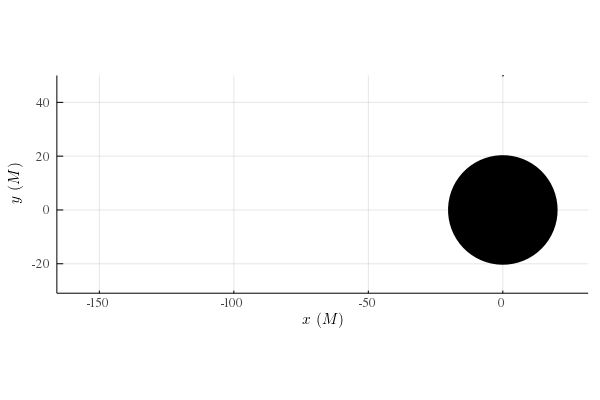

In [10]:
M = 10
ϵ = 0.5
n = 1 # número de vueltas
b = 3*sqrt(3)*M + 3.4823*M*exp(-2*n*π)
ℓ = ϵ*b

p = [M, ϵ, b, ℓ]

r0 = 5*M
ϕ0 = π/2

λ_final = 600.0
dλ = 1e-2

@time xs, ys, rs, ds = geodesics_schwarzschild(p, r0, ϕ0, λ_final, dλ);

animate_trajectory(xs, ys, "Animations/n1.gif")

  0.074060 seconds (1.35 M allocations: 68.999 MiB, 29.81% gc time)


┌ Info: Saved animation to 
│   fn = /home/david/Documentos/Física/Servicio/Servicio-Github/Notebooks/Schwarzschild/Animations/n3.gif
└ @ Plots /home/david/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/david/Documentos/Física/Servicio/Servicio-Github/Notebooks/Schwarzschild/Animations/n3.gif")
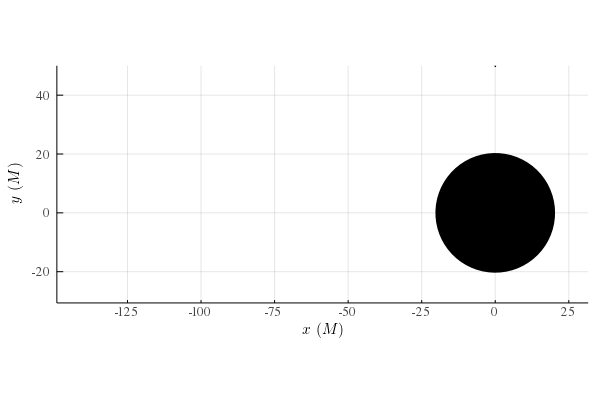

In [11]:
M = 10
ϵ = 0.5
n = 3 # número de vueltas
b = 3*sqrt(3)*M + 3.4823*M*exp(-2*n*π)
ℓ = ϵ*b

p = [M, ϵ, b, ℓ]

r0 = 5*M
ϕ0 = π/2

λ_final = 1000.0
dλ = 1e-2

@time xs, ys, rs, ds = geodesics_schwarzschild(p, r0, ϕ0, λ_final, dλ);

animate_trajectory(xs, ys, "Animations/n3.gif")

  0.090950 seconds (2.03 M allocations: 105.149 MiB, 25.73% gc time)


┌ Info: Saved animation to 
│   fn = /home/david/Documentos/Física/Servicio/Servicio-Github/Notebooks/Schwarzschild/Animations/n5.gif
└ @ Plots /home/david/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/david/Documentos/Física/Servicio/Servicio-Github/Notebooks/Schwarzschild/Animations/n5.gif")
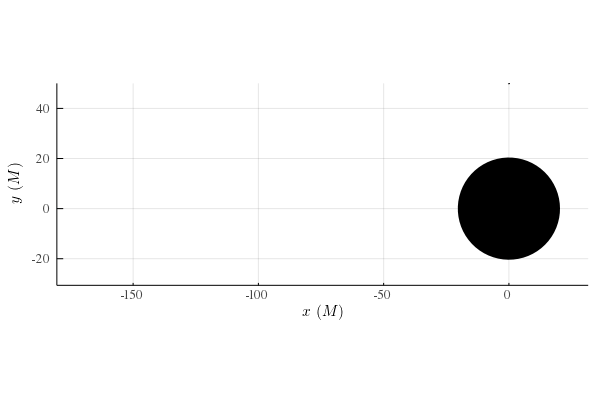

In [12]:
M = 10
ϵ = 0.5
n = 5 # número de vueltas
b = 3*sqrt(3)*M + 3.4823*M*exp(-2*n*π)
ℓ = ϵ*b

p = [M, ϵ, b, ℓ]

r0 = 5*M
ϕ0 = π/2

λ_final = 1500.0
dλ = 1e-2

@time xs, ys, rs, ds = geodesics_schwarzschild(p, r0, ϕ0, λ_final, dλ);

animate_trajectory(xs, ys, "Animations/n5.gif")

  0.074020 seconds (1.62 M allocations: 84.465 MiB, 16.07% gc time)


┌ Info: Saved animation to 
│   fn = /home/david/Documentos/Física/Servicio/Servicio-Github/Notebooks/Schwarzschild/Animations/n_inf.gif
└ @ Plots /home/david/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/david/Documentos/Física/Servicio/Servicio-Github/Notebooks/Schwarzschild/Animations/n_inf.gif")
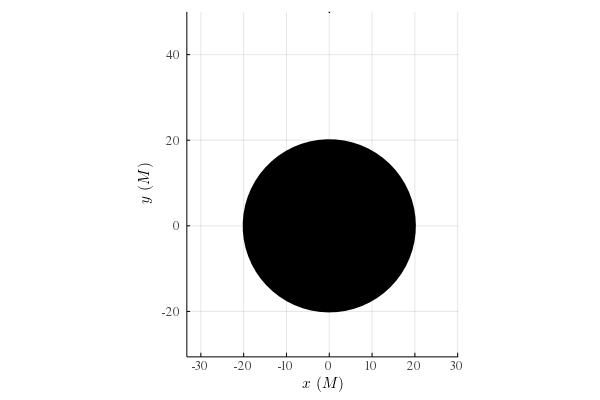

In [13]:
M = 10
ϵ = 0.5
n = Inf # número de vueltas
b = 3*sqrt(3)*M + 3.4823*M*exp(-2*n*π)
ℓ = ϵ*b

p = [M, ϵ, b, ℓ]

r0 = 5*M
ϕ0 = π/2

λ_final = 1200.0
dλ = 1e-2

@time xs, ys, rs, ds = geodesics_schwarzschild(p, r0, ϕ0, λ_final, dλ);

animate_trajectory(xs, ys, "Animations/n_inf.gif")

  0.080207 seconds (1.89 M allocations: 98.585 MiB, 22.75% gc time)


┌ Info: Saved animation to 
│   fn = /home/david/Documentos/Física/Servicio/Julia/Schwarzschild/n5.gif
└ @ Plots /home/david/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/david/Documentos/Física/Servicio/Julia/Schwarzschild/n5.gif")
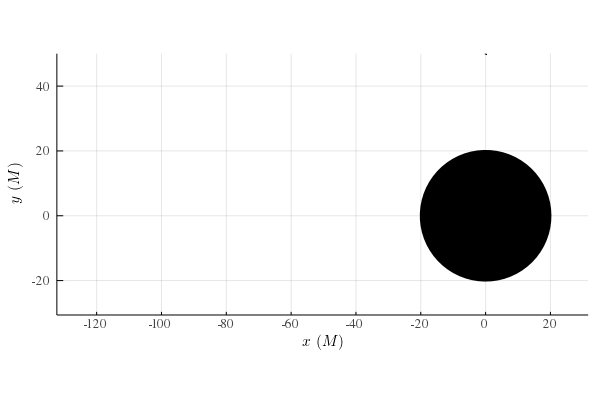

In [10]:
M = 10
ϵ = 0.5
n = 5 # número de vueltas
b = 3*sqrt(3)*M + 3.4823*M*exp(-2*n*π)
ℓ = ϵ*b

p = [M, ϵ, b, ℓ]

r0 = 5*M
ϕ0 = π/2

λ_final = 1400.0
dλ = 10.0^(-2)

@time xs, ys, rs, ds = geodesics_schwarzschild(p, r0, ϕ0, λ_final, dλ);

animar_trayectoria(xs, ys, "n5.gif")

  0.048063 seconds (1.35 M allocations: 68.999 MiB)


┌ Info: Saved animation to 
│   fn = /home/david/Documentos/Física/Servicio/Notebooks/Servicio-Github/Notebooks/Schwarzschild/n_inf.gif
└ @ Plots /home/david/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/david/Documentos/Física/Servicio/Notebooks/Servicio-Github/Notebooks/Schwarzschild/n_inf.gif")
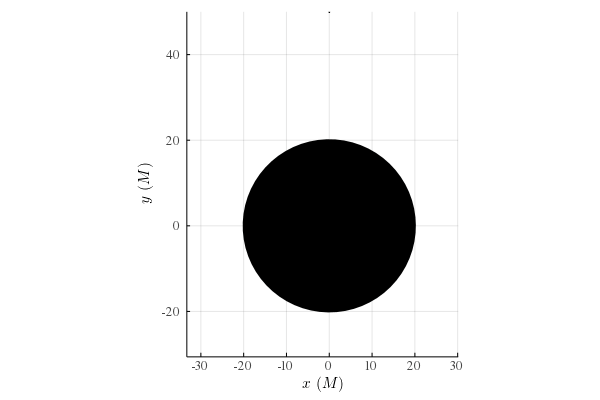

In [72]:
M = 10
ϵ = 0.5
n = Inf # número de vueltas
b = 3*sqrt(3)*M + 3.4823*M*exp(-2*n*π)
ℓ = ϵ*b

p = [M, ϵ, b, ℓ]

r0 = 5*M
ϕ0 = π/2

λ_final = 1000.0
dλ = 1e-2

@time xs, ys, rs, ds = geodesics_schwarzschild(p, r0, ϕ0, λ_final, dλ);

animate_trajectory(xs, ys, "n_inf.gif")